## Keras Upgrade

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step


In [ ]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

id = 1409
다음 그림은 Airplane 입니다.


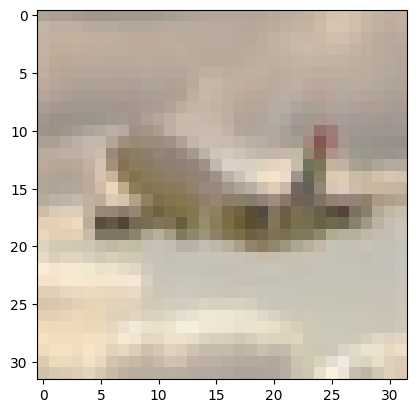

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

In [ ]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 1))

## Transfer Learning

In [ ]:
from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
keras.utils.clear_session()

base_model = ResNet50(weights='imagenet',          # 사전 학습 모델의 가중치를 어떤 데이터 기반으로 할 것인가
                         include_top=False,        # 아웃풋 레이어를 포함할 것인지
                         input_shape= (32,32,3),   # 인풋 데이터 모양
                        pooling='avg')             # Global Average Pooling 2D

output_layer = keras.layers.Dense(10, activation='softmax')(base_model.output)

new_model = keras.models.Model(base_model.input, output_layer)
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
len(new_model.layers)

177

In [ ]:
for layer in new_model.layers[:-1]:
    layer.trainable = False

In [ ]:
new_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=4, verbose=1, restore_best_weights=True)

In [ ]:
new_model.fit(train_x, train_y, validation_split=.2,
              epochs=10000, verbose=1,
              callbacks=[es])

Epoch 1/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.4537 - loss: 1.9262 - val_accuracy: 0.5686 - val_loss: 1.3708
Epoch 2/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.6031 - loss: 1.2121 - val_accuracy: 0.5671 - val_loss: 1.4210
Epoch 3/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6234 - loss: 1.1393 - val_accuracy: 0.5770 - val_loss: 1.4183
Epoch 4/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6368 - loss: 1.0973 - val_accuracy: 0.5964 - val_loss: 1.3722
Epoch 5/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6462 - loss: 1.0704 - val_accuracy: 0.5839 - val_loss: 1.4051
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


* Evaluate

In [ ]:
new_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5759 - loss: 1.3534


[1.3630168437957764, 0.5737000107765198]

* Inference

In [ ]:
y_pred = new_model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.ravel(test_y)

### Visualize Inference

id = 1746
다음 그림은 Bird 입니다.
모델의 예측 : Bird
모델의 카테고리별 확률 : 
{'Airplane': 17.0, 'Automobile': 0.0, 'Bird': 52.0, 'Cat': 0.0, 'Deer': 26.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 2.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


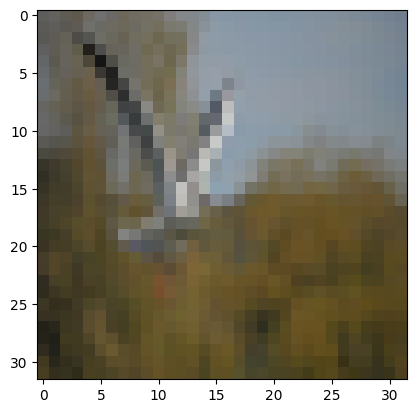

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y_arg[id]]} 입니다.')
print(f'모델의 예측 : {labels[y_pred_arg[id]]}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y_arg[id] == y_pred_arg[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (np.ravetest_y == y_pred)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y_arg[id]]} 입니다.')
print(f'모델의 예측 : {labels[y_pred_arg[id]]}')

prob = np.floor(y_pred[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y_arg[id] == y_pred_arg[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

AttributeError: module 'numpy' has no attribute 'ravetest_y'